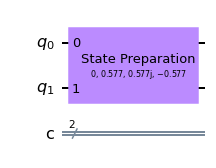

In [1]:
# 3.2.b amplitude encoding
import numpy as np
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram

circuit = QuantumCircuit(2,2)
circuit.prepare_state([0, 1/np.sqrt(3), 1.j/np.sqrt(3), -1/np.sqrt(3)], circuit.qubits)
circuit.draw('mpl')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


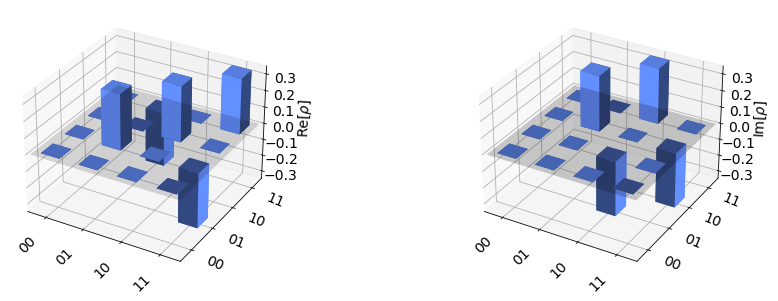

In [2]:
# city diagram
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=4)
plot_state_city(outputstate)

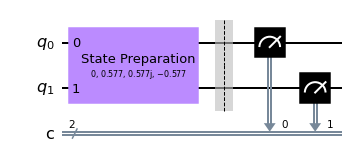

In [3]:
# measurement
circuit.barrier()
circuit.measure(range(2),range(2))
circuit.draw('mpl')


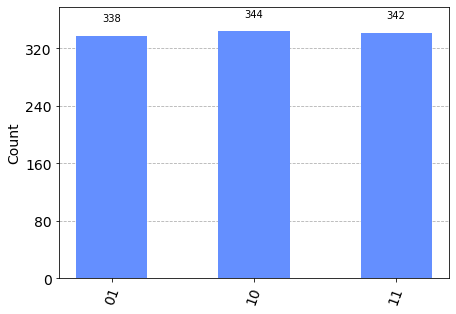

In [4]:
# histogram
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circuit, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit)
plot_histogram(counts)